In [37]:
# The import statements
import math
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Constants for configuration
DB_PATH = './simulation-series/series1.db'
TABLE_SUMMARIES = 'SUMMARIES'
TABLE_AVERAGED_RESULTS = 'AVERAGED_RESULTS'

In [39]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Query to retrieve the data from the database
query = f"SELECT * FROM {TABLE_SUMMARIES}"

# Read the data into a pandas DataFrame
dataframe = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
dataframe.head()

,timestamp,algorithm,alpha,assortativity,averageAuthorityScore,averageBetweennessCentrality,averageClosenessCentrality,averageDegreeCentrality,averageEccentricity,averageEigenvectorCentrality,...,stdevPageRank,stdevRichClubCoefficient,stdevnodeDegree,transitivity,graphType,objectStoragePath,numRounds,newEdges,triangleProbability,factor
0,2023-08-01-16-31-33,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.0018,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN
1,2023-08-01-16-39-18,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.0018,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN
2,2023-08-01-16-32-26,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.0018,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN
3,2023-08-01-16-33-18,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.0018,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN
4,2023-08-01-16-34-09,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.0018,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN


In [40]:
# Calculate the rounded modularity values
dataframe['rounded_modularity'] = dataframe['modularity'].round(1)
dataframe.head()

,timestamp,algorithm,alpha,assortativity,averageAuthorityScore,averageBetweennessCentrality,averageClosenessCentrality,averageDegreeCentrality,averageEccentricity,averageEigenvectorCentrality,...,stdevRichClubCoefficient,stdevnodeDegree,transitivity,graphType,objectStoragePath,numRounds,newEdges,triangleProbability,factor,rounded_modularity
0,2023-08-01-16-31-33,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN,0.1
1,2023-08-01-16-39-18,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN,0.1
2,2023-08-01-16-32-26,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN,0.1
3,2023-08-01-16-33-18,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN,0.1
4,2023-08-01-16-34-09,default,0.0593,-0.2746,0.001,0.001,0.512,0.0417,2.0,0.0239,...,0.2042,288.8194,0.1299,scale-free,series1-default-4e1b95b8-bf22-424e-b8ce-3e65a3...,5.0,NaN,NaN,NaN,0.1


In [41]:
# Group the DataFrame by 'algorithm'
group_by_alg = dataframe.groupby('algorithm')

# Create a dictionary to store the smaller DataFrames
alg_df = {}

# Iterate over the groups and store them in the dictionary
for algorithm, group_df in group_by_alg:
    alg_df[algorithm] = group_df

alg_df.keys()

dict_keys(['default', 'weighted_factor'])

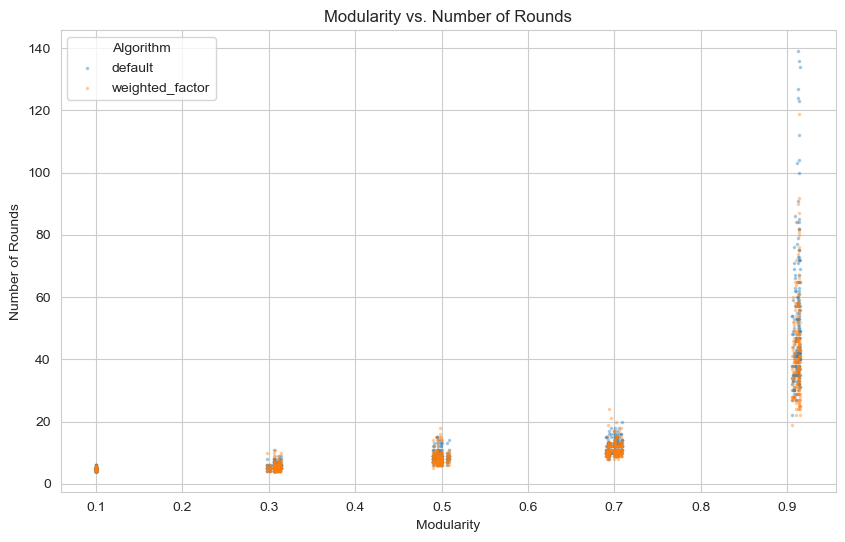

In [42]:
# Create a pretty plot using matplotlib
plt.figure(figsize=(10, 6))

for alg, df in alg_df.items():
    plt.scatter(df['modularity'], df['numRounds'], label=alg, alpha=0.3, marker='.', s=10)

plt.xlabel('Modularity')
plt.ylabel('Number of Rounds')
plt.title('Modularity vs. Number of Rounds')
plt.legend(title='Algorithm')

# Show the plot
plt.show()

In [43]:
# Group the DataFrame by 'algorithm' and 'factor'
group_by_mod = dataframe.groupby('rounded_modularity')

# Create a dictionary to store the smaller DataFrames
grouped_df = {}

# Iterate over the groups and store them in the dictionary
for mod, group_df in group_by_mod:
    grouped_df[f'{mod}'] = group_df

grouped_df.keys()

dict_keys(['0.1', '0.3', '0.5', '0.7', '0.9'])

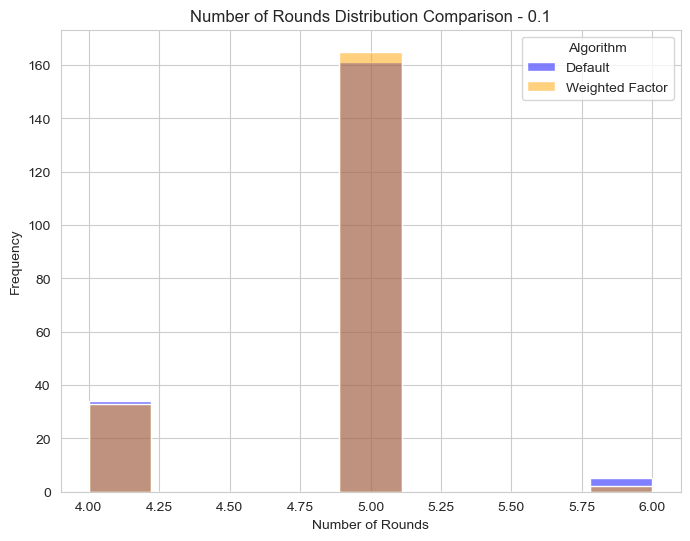

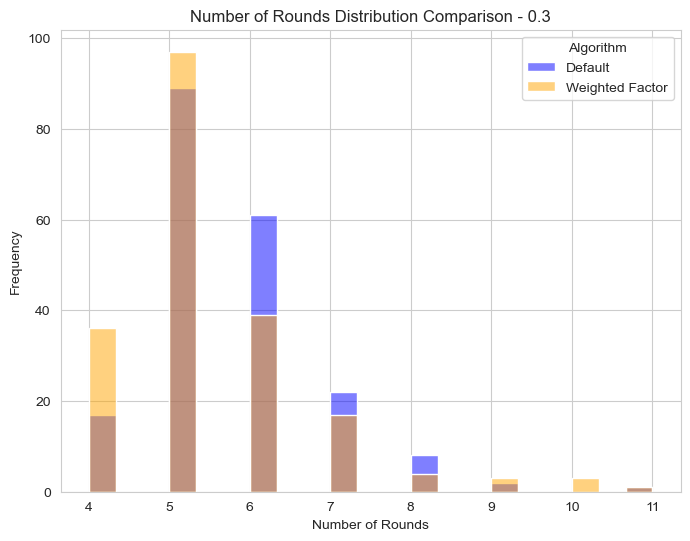

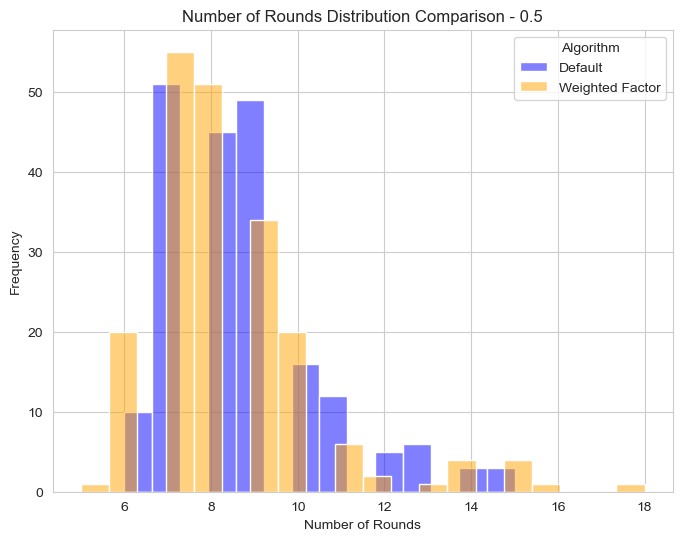

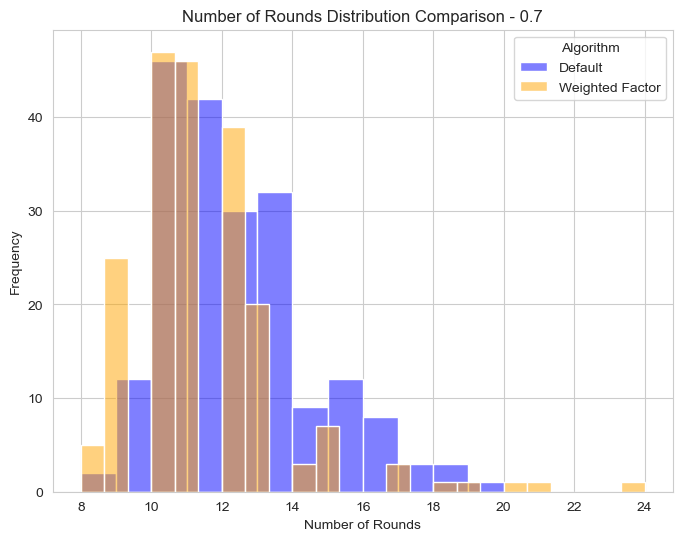

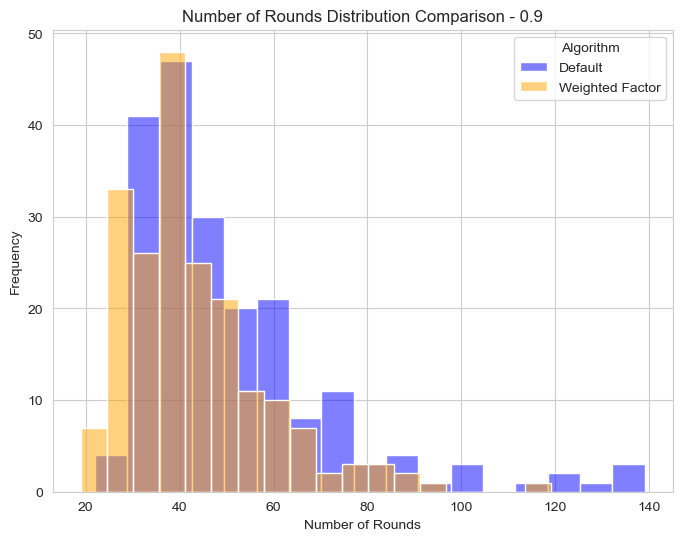

In [44]:
# Sort the grouped DataFrame keys
sorted_keys = sorted(grouped_df.keys())

# Iterate over the sorted grouped keys and create separate plots
for idx, group_key in enumerate(sorted_keys):
    # Get the DataFrame for the current key
    group_df = grouped_df[group_key]

    # Split the DataFrame into default and weighted_factor data
    default_data = group_df[group_df['algorithm'] == 'default']
    weighted_factor_data = group_df[group_df['algorithm'] == 'weighted_factor']

    # Create a new plot for each rounded modularity combination
    plt.figure(figsize=(8, 6))
    sns.histplot(data=default_data, x='numRounds', label='Default', color='blue', alpha=0.5)
    sns.histplot(data=weighted_factor_data, x='numRounds', label='Weighted Factor', color='orange', alpha=0.5)

    plt.xlabel('Number of Rounds')
    plt.ylabel('Frequency')
    plt.title(f'Number of Rounds Distribution Comparison - {group_key}')
    plt.legend(title='Algorithm')

    # Show the plot
    plt.show()

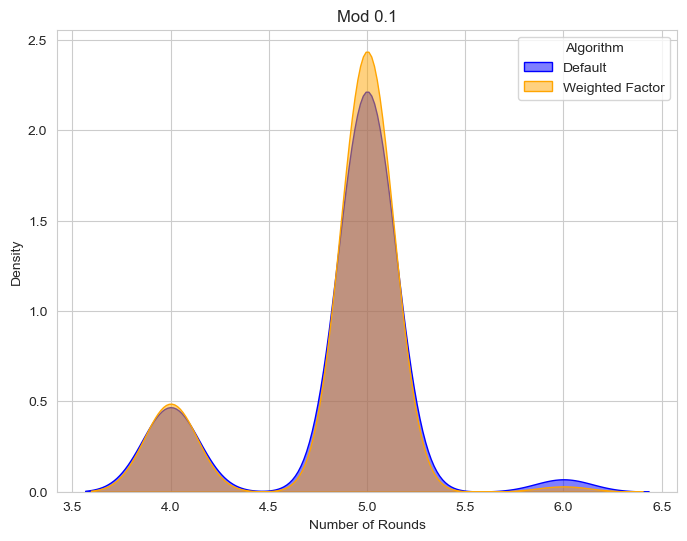

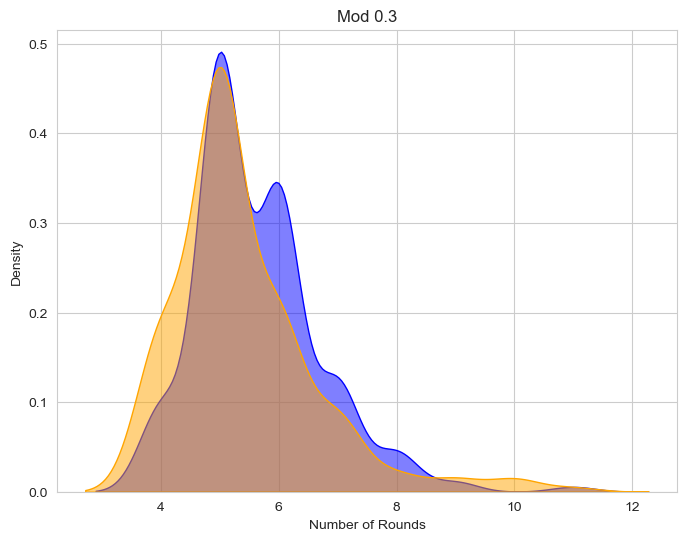

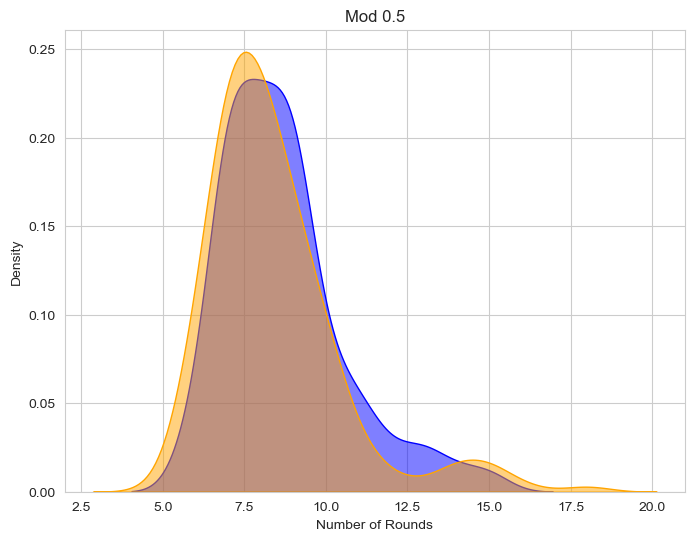

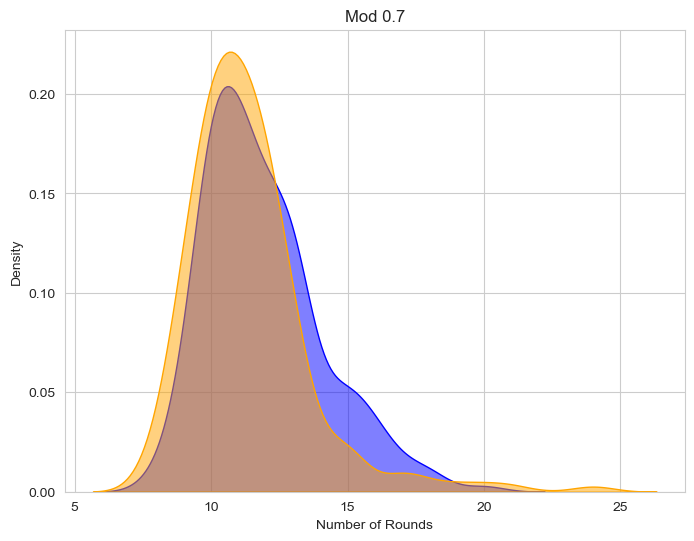

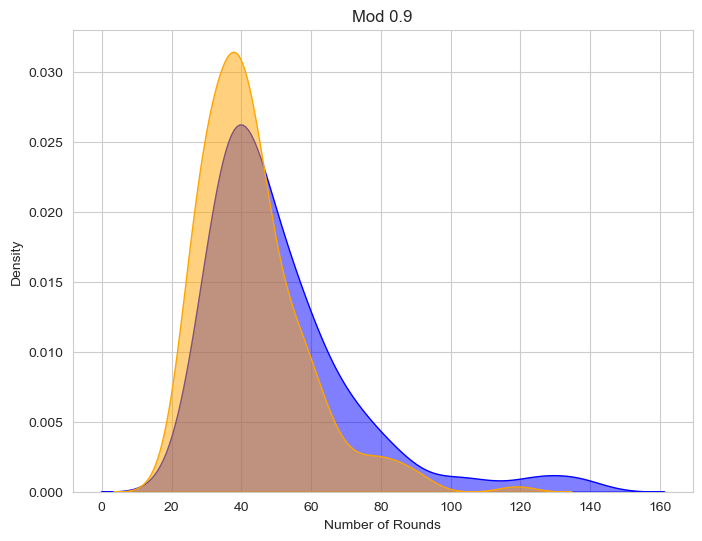

In [54]:
# Sort the grouped DataFrame keys
sorted_keys = sorted(grouped_df.keys())

# Iterate over the sorted grouped keys and create separate plots
for idx, group_key in enumerate(sorted_keys):
    # Get the DataFrame for the current key
    group_df = grouped_df[group_key]

    # Split the DataFrame into default and weighted_factor data
    default_data = group_df[group_df['algorithm'] == 'default']
    weighted_factor_data = group_df[group_df['algorithm'] == 'weighted_factor']

    # Create a new plot for each rounded modularity combination
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=default_data, x='numRounds', label='Default', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(data=weighted_factor_data, x='numRounds', label='Weighted Factor', color='orange', fill=True, alpha=0.5)

    plt.xlabel('Number of Rounds')
    plt.ylabel('Density')
    plt.title(f'Mod {group_key}')
    if(idx==0):
        plt.legend(title='Algorithm')

    # Show the plot
    plt.show()

In [46]:
def print_performance_difference(dataframe, text):
    # Calculate the total number of rounds for the default algorithm
    total_rounds_default = dataframe[dataframe['algorithm'] == 'default']['numRounds'].sum()

    # Calculate the total number of rounds for the weighted_factor algorithm
    total_rounds_weighted_factor = dataframe[dataframe['algorithm'] == 'weighted_factor']['numRounds'].sum()

    # Calculate the percentage change
    percentage_change = ((total_rounds_weighted_factor - total_rounds_default) / total_rounds_default) * 100

    print(f"The weighted_factor algorithm is {abs(percentage_change):.2f}% {'faster' if percentage_change < 0 else 'slower'} for {text}.")

In [47]:
print_performance_difference(dataframe, 'all data points')

The weighted_factor algorithm is 11.17% faster for all data points.


In [48]:
for mod, df in grouped_df.items():
    print_performance_difference(df, f'the data points with mod {mod}')

The weighted_factor algorithm is 0.21% faster for the data points with mod 0.1.
The weighted_factor algorithm is 3.91% faster for the data points with mod 0.3.
The weighted_factor algorithm is 3.34% faster for the data points with mod 0.5.
The weighted_factor algorithm is 4.70% faster for the data points with mod 0.7.
The weighted_factor algorithm is 15.86% faster for the data points with mod 0.9.


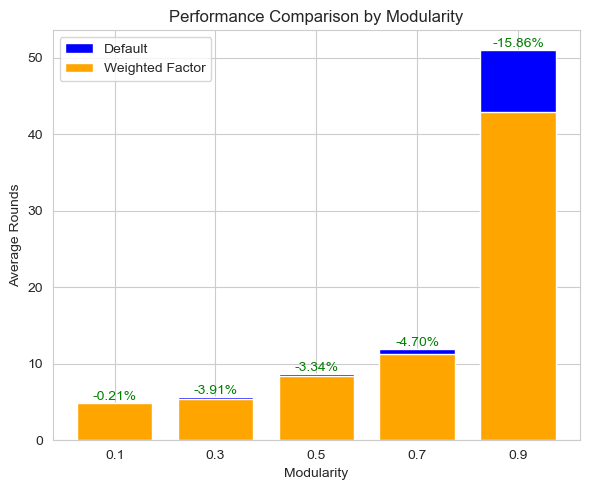

In [49]:
def plot_combined_performance(dataframe, grouped_df):
    modularity_values = []
    default_rounds = []
    weighted_factor_rounds = []
    differences = []

    for mod, df in grouped_df.items():
        modularity_values.append(float(mod))

        total_rounds_default = df[df['algorithm'] == 'default']['numRounds'].mean()  # Calculate the mean instead of sum
        total_rounds_weighted_factor = df[df['algorithm'] == 'weighted_factor']['numRounds'].mean()  # Calculate the mean instead of sum
        default_rounds.append(total_rounds_default)
        weighted_factor_rounds.append(total_rounds_weighted_factor)

        percentage_change = ((total_rounds_weighted_factor - total_rounds_default) / total_rounds_default) * 100
        differences.append(percentage_change)

    plt.figure(figsize=(6, 5))
    bar_width = 0.15

    plt.bar([i for i in modularity_values], default_rounds, width=bar_width, color='blue', label='Default')
    plt.bar([i for i in modularity_values], weighted_factor_rounds, width=bar_width, color='orange', label='Weighted Factor')
    plt.xlabel('Modularity')
    plt.ylabel('Average Rounds')
    plt.title("Performance Comparison by Modularity")
    plt.xticks(modularity_values)
    plt.legend()

    for i, diff in enumerate(differences):
        plt.text(modularity_values[i], max(default_rounds[i], weighted_factor_rounds[i]), f"{diff:.2f}%", ha='center', va='bottom', fontsize=10, color='red' if diff >= 0 else 'green')

    plt.tight_layout()
    plt.show()

plot_combined_performance(dataframe, grouped_df)

In [50]:
def plot_correlation_matrices(dataframe, text):
    # Compute correlations between numerical columns and 'numRounds'
    correlation_matrix = dataframe.corr(numeric_only=True)

    # Filter out non-numerical columns, timestamps, and text value columns
    numerical_columns = correlation_matrix.columns[(correlation_matrix.dtypes != 'object')
                        & (correlation_matrix.columns != 'numRounds')]

    # Filter columns where correlation values are greater than 0 and not NaN or empty
    valid_numerical_columns = [col for col in numerical_columns if
                               correlation_matrix.loc['numRounds', col] > 0 or
                               correlation_matrix.loc['numRounds', col] < 0 and
                               not pd.isnull(correlation_matrix.loc['numRounds', col])]

     # Plot correlation values
    plt.figure(figsize=(15, 6))  # Increase figure size to avoid x-axis overlap
    sns.barplot(x=valid_numerical_columns, y=correlation_matrix.loc['numRounds', valid_numerical_columns])
    plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels rotation and alignment
    plt.xlabel('Columns')
    plt.ylabel('Correlation with numRounds')
    plt.title(f'Correlation of Columns with numRounds for {text}')
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Sort columns based on absolute correlation values with 'numRounds'
    sorted_columns = sorted(valid_numerical_columns,
                            key=lambda col: abs(correlation_matrix.loc['numRounds', col]),
                            reverse=True)

    # Select the top 10 columns with the highest correlation values
    top_columns = sorted_columns[:10]

    # Plot correlation values
    plt.figure(figsize=(6, 6))  # Increase figure size to avoid x-axis overlap
    sns.barplot(x=top_columns, y=correlation_matrix.loc['numRounds', top_columns])
    plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels rotation and alignment
    plt.xlabel('Columns')
    plt.ylabel('Correlation with numRounds')
    plt.title(f'Correlation of Columns with numRounds for {text}')
    plt.tight_layout()

    # Show the plot
    plt.show()

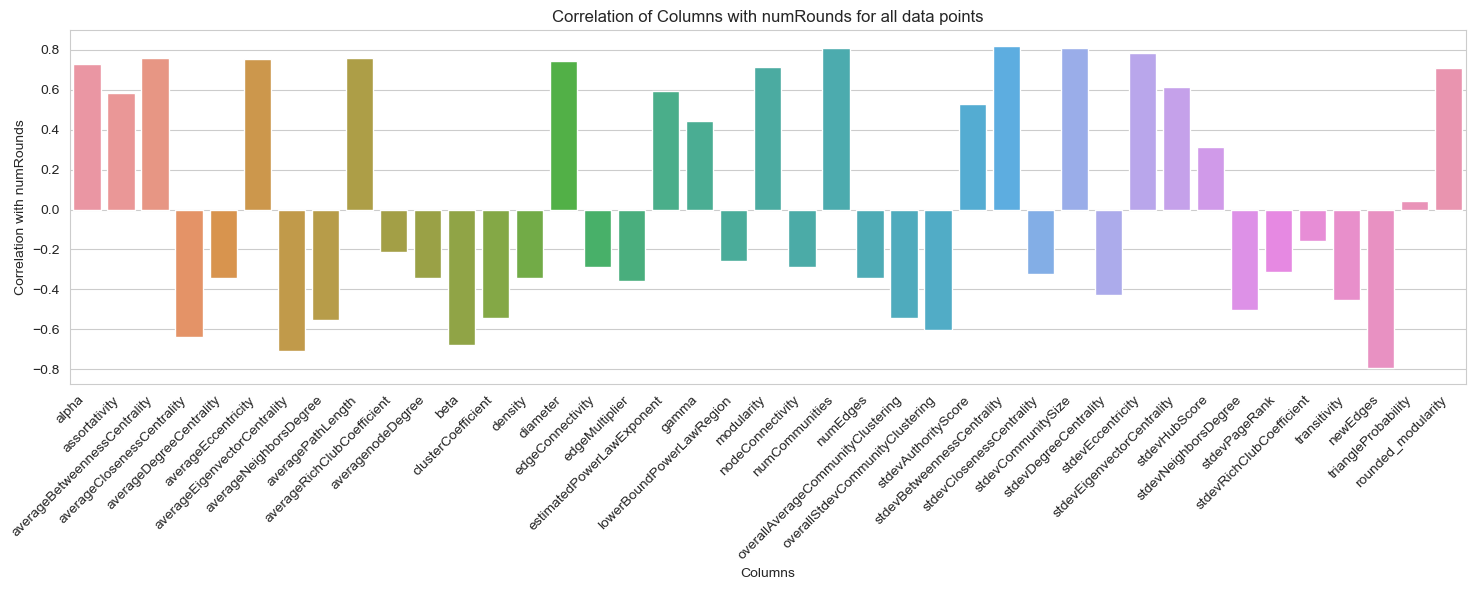

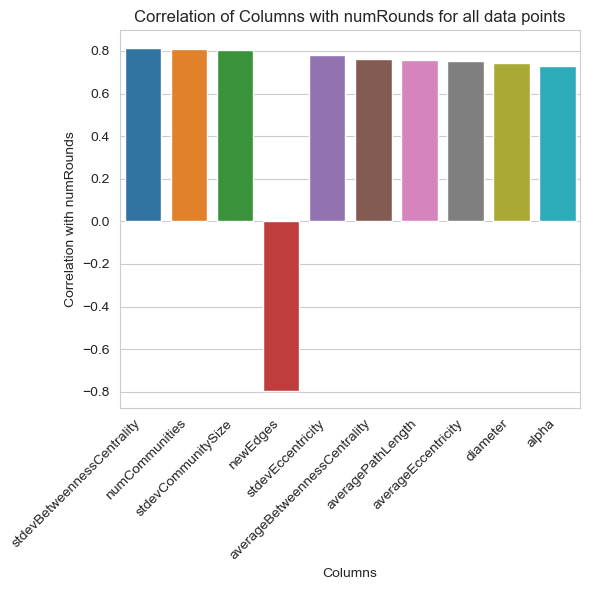

In [51]:
plot_correlation_matrices(dataframe, 'all data points')

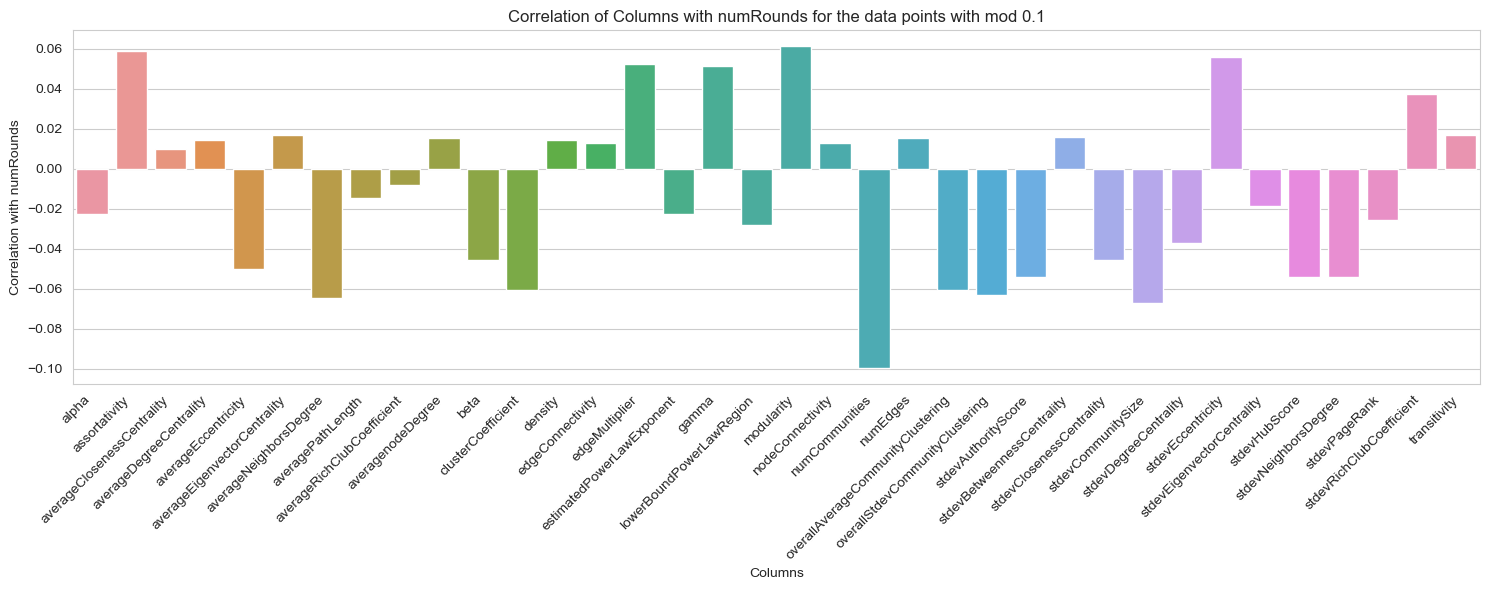

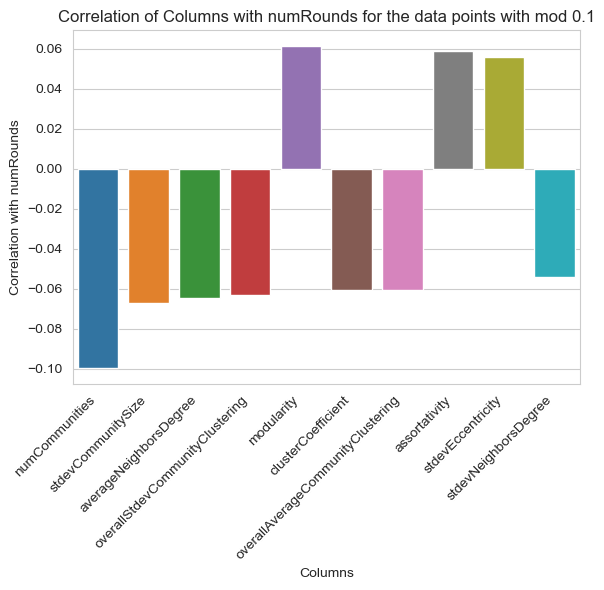

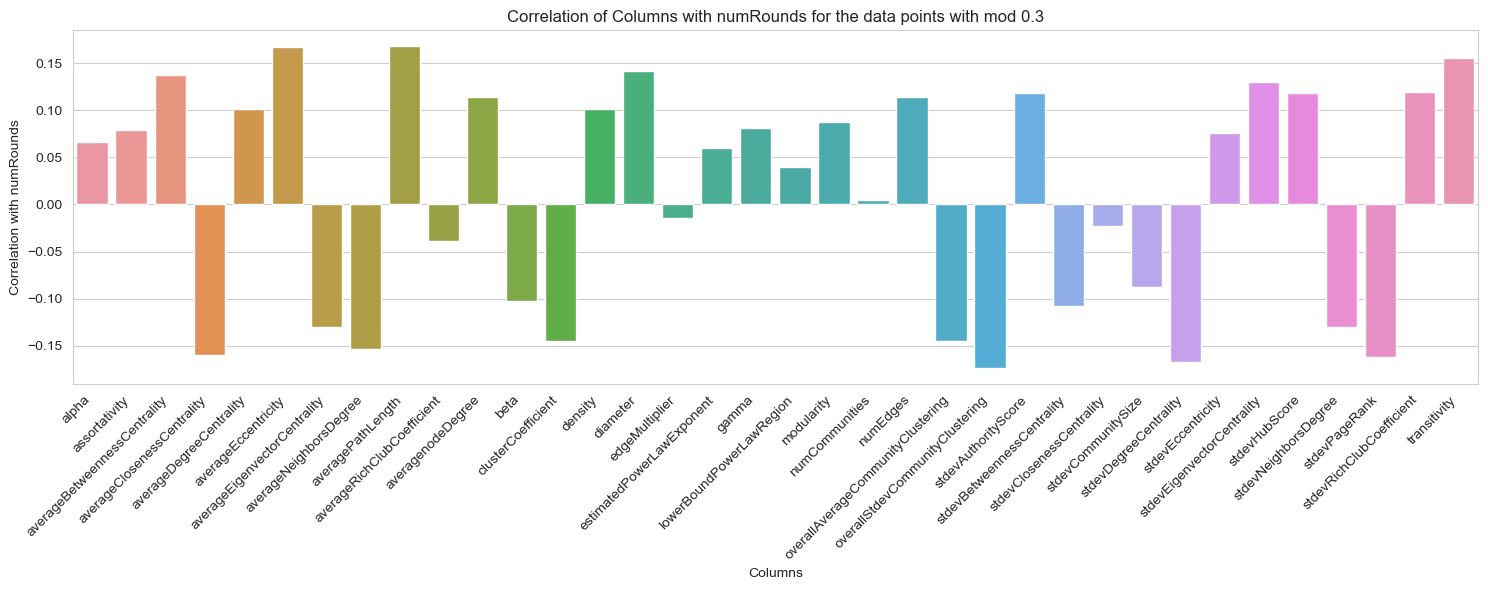

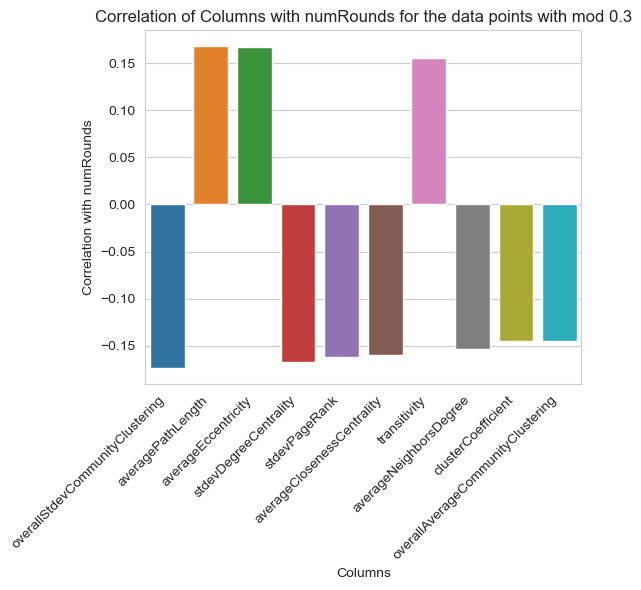

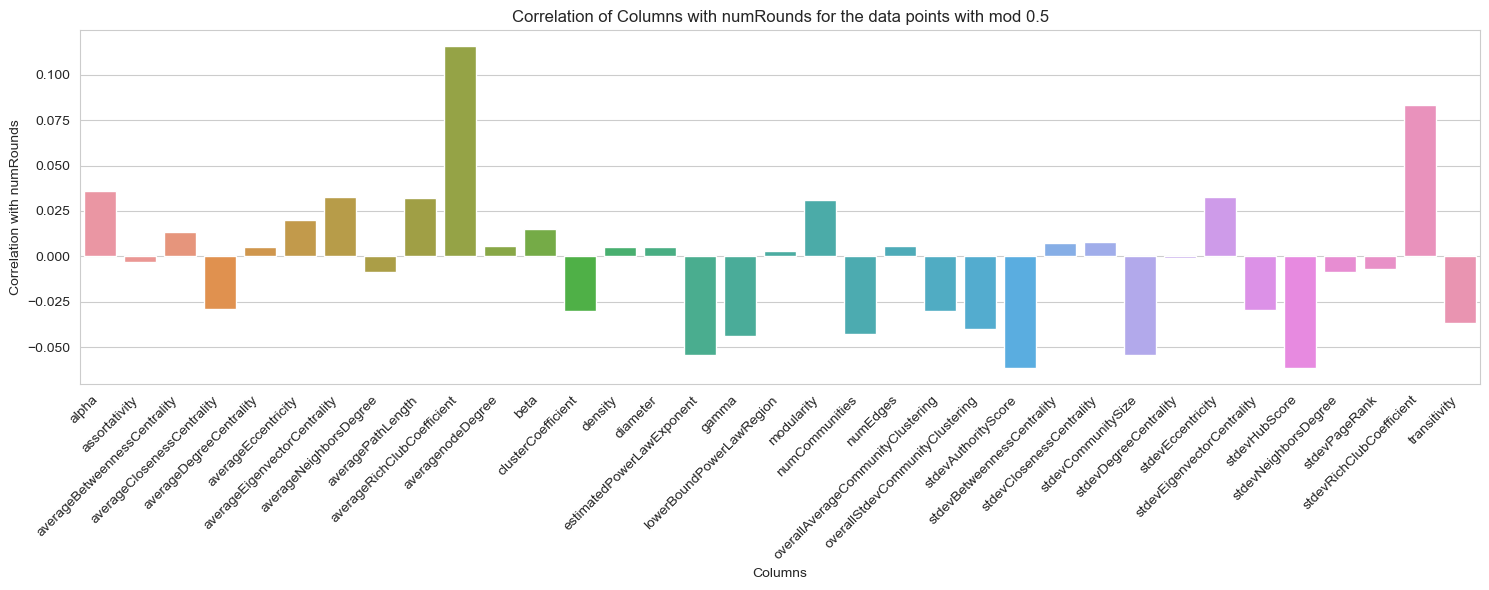

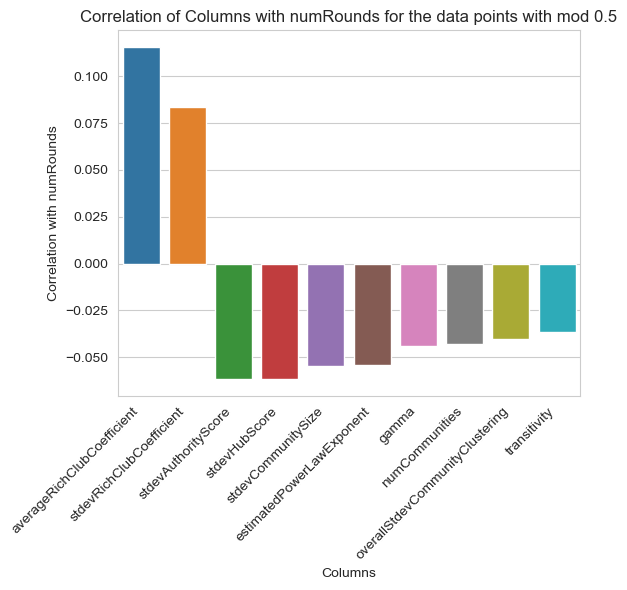

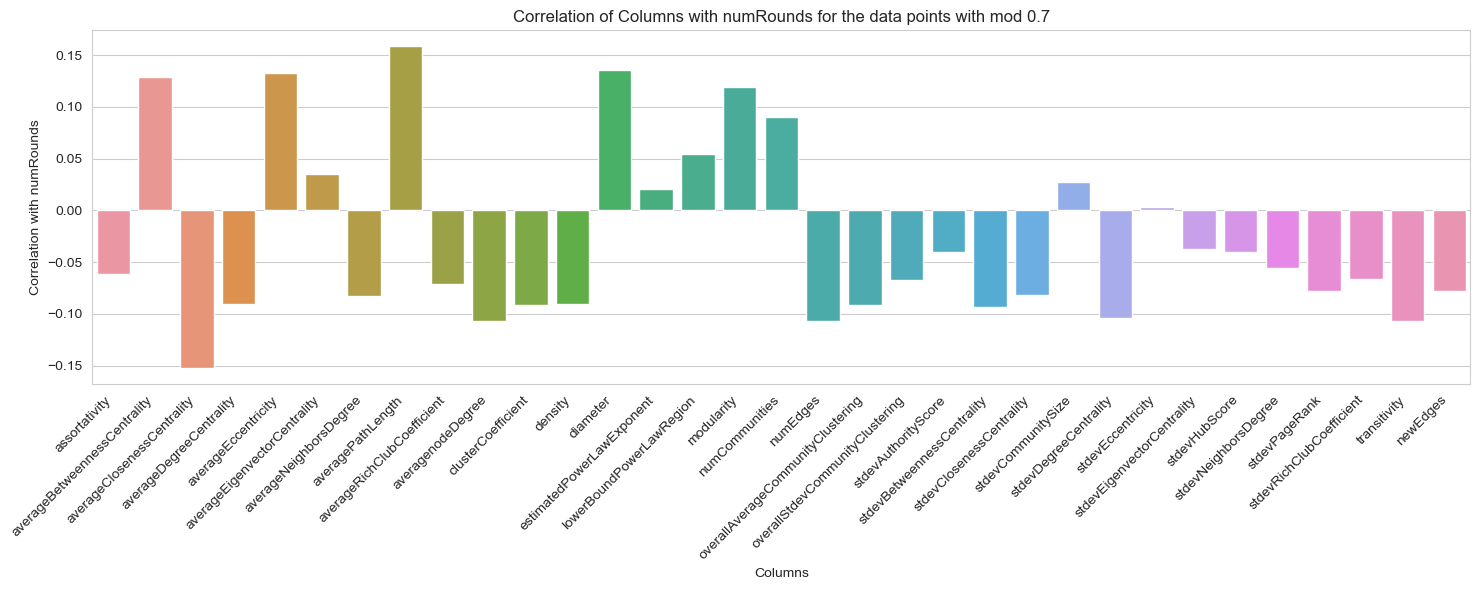

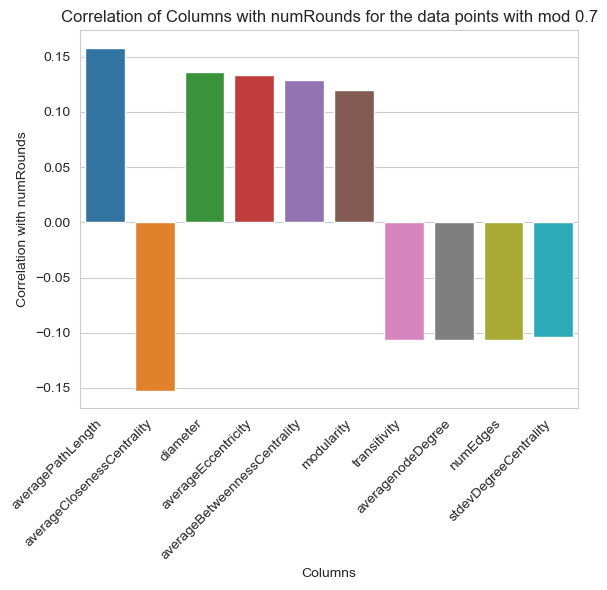

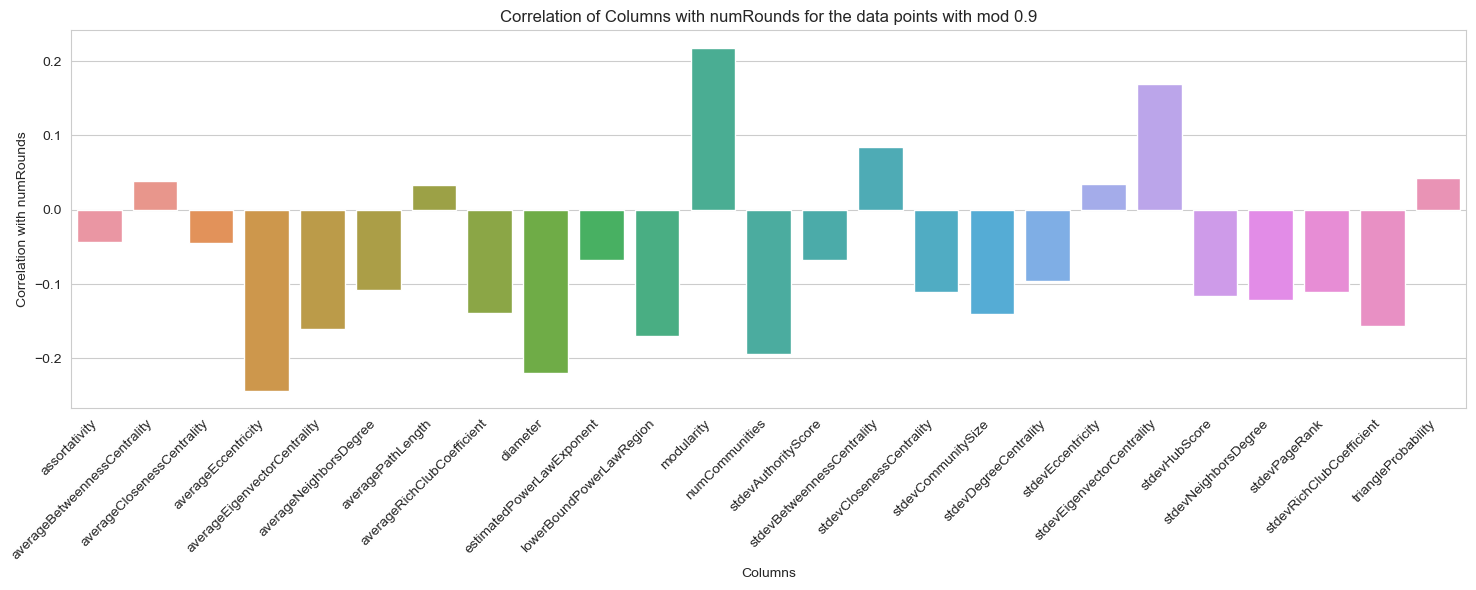

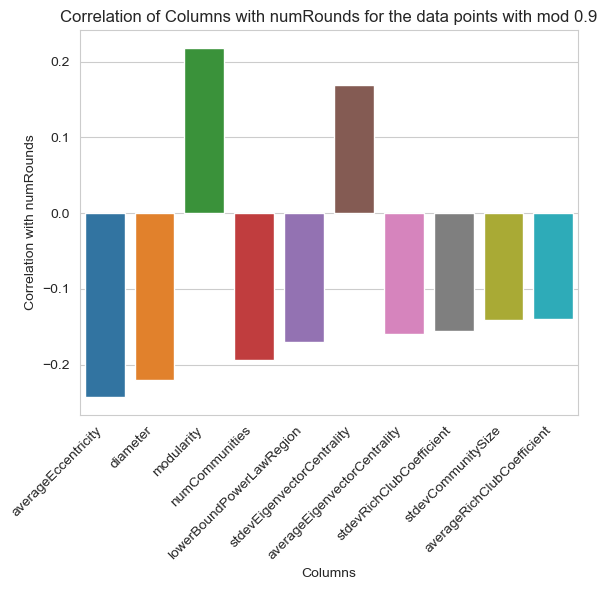

In [52]:
for mod, df in grouped_df.items():
    plot_correlation_matrices(df, f'the data points with mod {mod}')